In [1]:
# Import necessary libraries.
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file
goal_stat = pd.read_csv('Goal_stat_website.csv')

# View the dataframe
goal_stat.head()

,Date,Campaign,Audience,Creative - Family,Creative - Version,Platform,Ad Format,Goal,Completions,Campaign Traffic?,Days away from max date,Latest report?
0,2022-04-01,(not set),NaN,(not set),(not set),NaN,NaN,Learn More (Community Mortgage),2,General traffic,213,0
1,2022-04-01,(not set),NaN,(not set),(not set),NaN,NaN,Form Submission,2,General traffic,213,0
2,2022-04-01,(not set),NaN,(not set),(not set),NaN,NaN,Home Page Video Play,1,General traffic,213,0
3,2022-04-01,(not set),NaN,(not set),(not set),NaN,NaN,Learn More (Closer Twins Banner),1,General traffic,213,0
4,2022-04-01,(not set),NaN,(not set),(not set),NaN,NaN,Learn More (Community Mortgage),18,General traffic,213,0


In [3]:
# Explore the dataset
goal_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16509 entries, 0 to 16508
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     16509 non-null  object
 1   Campaign                 16509 non-null  object
 2   Audience                 4242 non-null   object
 3   Creative - Family        16509 non-null  object
 4   Creative - Version       16509 non-null  object
 5   Platform                 4549 non-null   object
 6   Ad Format                4427 non-null   object
 7   Goal                     16509 non-null  object
 8   Completions              16509 non-null  int64 
 9   Campaign Traffic?        16509 non-null  object
 10  Days away from max date  16509 non-null  int64 
 11  Latest report?           16509 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


# Data Cleaning Procedure for each column

In [4]:
# Rename some columns
goal_stat.rename(columns = {'Campaign Traffic?':'Campaign Traffic', 'Creative - Family':'Creative_Family',
                              'Creative - Version':'Creative_Version', 'Ad Format':'Ad_Format',
                              'Days_away_from_max_date':'Days_away_from_max_date',
                               'Latest report?':'Latest_report',},inplace = True)

In [5]:
goal_stat['Campaign'].unique()

array(['(not set)', 'Announcement', 'NBNurture',
       'FY22_broker_campaign_ph2', 'FY22_broker_campaign', 'Brand_Exact',
       'Brand_Phrase', 'NB_Wholesale_Exact', 'NB_Wholesale_Phrase',
       'FY23_broker_campaign', 'FY23_change_digital_phase3',
       'FY22_Broker_Campaign',
       '5d7f312058-EMAIL_CAMPAIGN_2022_03_27_11_04_COPY_01',
       'c9dcf05b32-EMAIL_CAMPAIGN_2022_03_21_12_37_COPY_01',
       'f27ee0be9c-EMAIL_CAMPAIGN_2022_03_27_11_04_COPY_01', 'AE_Intro',
       'Change_Wholesale_plusup', 'adhocwhol', 'Active Broker Emails',
       'closr', 'e3bc604b28-EMAIL_CAMPAIGN_2022_08_02_05_34', '2022',
       'LORecruiting', 'FY22_anti_inflation', 'August_Mesaage',
       'Anti_Inflation', 'CloserTwins', 'Q4_2022'], dtype=object)

In [6]:
# Replace some values in campaign column
goal_stat['Campaign'].replace({'(not set)':'NaN', '5d7f312058-EMAIL_CAMPAIGN_2022_03_27_11_04_COPY_01':'Others',
       'c9dcf05b32-EMAIL_CAMPAIGN_2022_03_21_12_37_COPY_01':'Others', 'Brand_Exact':'Brand_Cmpaign',
       'f27ee0be9c-EMAIL_CAMPAIGN_2022_03_27_11_04_COPY_01':'Others', 'Brand_Phrase':'Brand_Campaign',
       'e3bc604b28-EMAIL_CAMPAIGN_2022_08_02_05_34':'Others', '2022':'Others',
       'FY22_broker_campaign_ph2':'Broker_Campaign', 'FY22_broker_campaign':'Broker_Campaign', 
       'FY23_broker_campaign':'Broker_Campaign', 'FY22_Broker_Campaign':'Broker_Campaign',
       'NBNurture':'Others', 'Announcement':'Others', 'CloserTwins':'Others', 
       'NB_Wholesale_Exact':'NB_Wholesales', 'NB_Wholesale_Phrase':'NB_Wholesales',
       'AE_Intro':'Others', 'Change_Wholesale_plusup':'Others', 'LORecruiting':'Others',
       'Active Broker Emails':'Others', 'closr':'Others', 'FY22_anti_inflation':'Others',
       'August_Mesaage':'Others', 'Anti_Inflation':'Others', 'Q4_2022':'Others'}, inplace = True)

In [7]:
goal_stat['Campaign'].unique()

array(['NaN', 'Others', 'Broker_Campaign', 'Brand_Cmpaign',
       'Brand_Campaign', 'NB_Wholesales', 'FY23_change_digital_phase3',
       'adhocwhol'], dtype=object)

In [8]:
goal_stat['Audience'].unique()

array([nan, 'General Targetting', 'test4', '4', '2', '5', '1', '3',
       '1to4'], dtype=object)

In [9]:
# To replace 'General Targetting' to '6', 'test4' to '4' and '1to4' to '4'
goal_stat['Audience'].replace({'1to4':'4', 'test4':'4', 'General Targetting':'6'}, inplace = True)

In [10]:
goal_stat['Audience'].unique()

array([nan, '6', '4', '2', '5', '1', '3'], dtype=object)

In [11]:
goal_stat['Creative_Family'].unique()

array(['(not set)', 'SEM Ads', 'Trade Media Ads',
       'CompetitiveOpportunity', 'CloseFaster', 'CloserTwins',
       'newsletter', 'One-Off', 'SnapdocsLive', 'UnfairAdvantage',
       'ComingSoon', '219526440', 'domain', 'All3', '08-24-2022',
       '08-25-2022', '08-29-2022', 'August', 'crm', '09-06-2022',
       '09-08-2022'], dtype=object)

In [12]:
# Replace some response with 'NaN' and 'Others'
goal_stat['Creative_Family'].replace({'(not set)':'NaN', '219526440':'NaN', 'All3':'Others',
                                      '08-24-2022':'NaN', '08-25-2022':'NaN', '08-29-2022':'NaN', 
                                      '09-06-2022':'NaN','09-08-2022':'NaN', 'newsletter':'Others',
                                      'One-Off':'Others', 'SnapdocsLive':'Others', 'ComingSoon':'Others',
                                      'August':'Others', 'crm':'Others', 'domain':'Others'}, inplace = True)

In [13]:
goal_stat['Creative_Family'].unique()

array(['NaN', 'SEM Ads', 'Trade Media Ads', 'CompetitiveOpportunity',
       'CloseFaster', 'CloserTwins', 'Others', 'UnfairAdvantage'],
      dtype=object)

In [14]:
goal_stat['Creative_Version'].unique()

array(['(not set)', '300x250', '728x90', 'Cancelingyourlock',
       'Change Wholesale', 'Close More. Close Faster.', '3steps',
       'MoreAll', 'NoDTI', 'CloseMore', 'Competitors', 'Cutdown1A',
       'Cutdown1B', 'EarlyBird', 'Faceoff', 'Faceoff1', 'Faceoff2',
       'Faster', 'interactive', 'MoreLoans', 'MoreLoansAll', 'Namaste',
       'Paperwork', 'RTB', 'ShapeUp', 'OTT_15', 'OTT_30', 'OTT_30QR',
       'One-Off', 'Rate Lock', 'ROS1', 'ROS5', 'SnapdocsLive',
       'Theycancelweclose', '1099', '1page', 'All', 'OnePage',
       "We Are America's CDFI", 'ComingSoon', 'Animated', '219526440',
       'FasterAll', 'MoreNoReg', 'ad1', 'ROP', 'All3', '08-24-2022',
       '08-25-2022', '08-29-2022', 'August', '09-06-2022', '09-08-2022'],
      dtype=object)

In [15]:
goal_stat['Creative_Version'].replace({'(not set)':'NaN', '300x250':'Others', '728x90':'Others', 
                                       '1099':'Others', '1page':'OnePage', '219526440':'Others',
                                       '08-24-2022':'Others', '08-25-2022':'Others',
                                       '08-29-2022':'Others', '09-06-2022':'Others',
                                       'Close More. Close Faster.':'CloseMore', '09-08-2022':'NaN',
                                       'August':'Others', 'Cancelingyourlock':'Others',
                                       'MoreLoans':'More', 'MoreLoansAll':'More', 
                                       'MoreNoReg':'More', 'MoreAll':'More',
                                       'Competitors':'Others', 'Cutdown1A':'Cutdown',
                                       'Cutdown1B':'Cutdown', 'Faceoff':'Others', 
                                       'Faceoff1':'Others', 'Faceoff2':'Others',
                                       'FasterAll':'Faster', 'interactive':'Others', 
                                       'Namaste':'Others','One-Off':'Others',
                                       'OnePage':'Others', 'OTT_15':'Others', 
                                       'OTT_30':'Others', 'OTT_30QR':'Others', 
                                       'Paperwork':'Others', 'ROS1':'ROS',
                                       'ROS5':'ROS', 'ShapeUp':'Others',
                                       'SnapdocsLive':'Others', 
                                       'Theycancelweclose':'Others'}, inplace = True)

In [16]:
goal_stat['Creative_Version'].unique()

array(['NaN', 'Others', 'Change Wholesale', 'CloseMore', '3steps', 'More',
       'NoDTI', 'Cutdown', 'EarlyBird', 'Faster', 'RTB', 'Rate Lock',
       'ROS', 'OnePage', 'All', "We Are America's CDFI", 'ComingSoon',
       'Animated', 'ad1', 'ROP', 'All3'], dtype=object)

# Create target group column

In [17]:
goal_stat['Target_Groups'] = goal_stat.loc[:, 'Audience']

goal_stat.head()

,Date,Campaign,Audience,Creative_Family,Creative_Version,Platform,Ad_Format,Goal,Completions,Campaign Traffic,Days away from max date,Latest_report,Target_Groups
0,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Learn More (Community Mortgage),2,General traffic,213,0,NaN
1,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Form Submission,2,General traffic,213,0,NaN
2,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Home Page Video Play,1,General traffic,213,0,NaN
3,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Learn More (Closer Twins Banner),1,General traffic,213,0,NaN
4,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Learn More (Community Mortgage),18,General traffic,213,0,NaN


In [18]:
# Replace Audience '1,2,3' as '1' in Target_Group
goal_stat['Target_Groups'] = goal_stat['Target_Groups'].replace(['1', '2', '3'], '1')

In [19]:
# Replace Audience '4,5' as '2' in Target_Group
goal_stat['Target_Groups'] = goal_stat['Target_Groups'].replace(['4', '5'], '2')

In [20]:
# Replace Audience '6' as '3' in Target_Group
goal_stat['Target_Groups'] = goal_stat['Target_Groups'].replace(['6'], '3')

In [21]:
goal_stat['Target_Groups'].unique()

array([nan, '3', '2', '1'], dtype=object)

# To convert the date from object to datetime

In [22]:
# To convert the date to datetime
goal_stat['Date'] = pd.to_datetime(goal_stat['Date'], format='%Y/%m')
print(goal_stat.dtypes)

Date                       datetime64[ns]
Campaign                           object
Audience                           object
Creative_Family                    object
Creative_Version                   object
Platform                           object
Ad_Format                          object
Goal                               object
Completions                         int64
Campaign Traffic                   object
Days away from max date             int64
Latest_report                       int64
Target_Groups                      object
dtype: object


In [23]:
goal_stat.to_csv('goal-stat_cleaned.csv')

In [24]:
# Import the necessary libraries for visualisations.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the plot style as white.
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Target Group distribution')

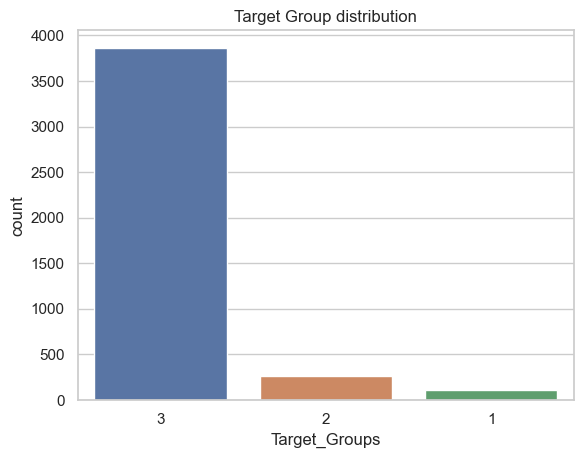

In [25]:
# countplot of Target group distribution
sns.countplot(x=goal_stat["Target_Groups"])

sns.set(rc={'figure.figsize': (8, 8)})
plt.title('Target Group distribution', fontsize=12)

In [26]:
# Create the subset of goal_stat
goal_stat_tg1 = goal_stat[goal_stat['Target_Groups']== '1']

# View DataFrame
goal_stat_tg1

,Date,Campaign,Audience,Creative_Family,Creative_Version,Platform,Ad_Format,Goal,Completions,Campaign Traffic,Days away from max date,Latest_report,Target_Groups
5729,2022-06-09,Broker_Campaign,2,CloseFaster,3steps,LinkedIn,Single image,Learn More (Community Mortgage),1,Campaign,144,0,1
5730,2022-04-28,Broker_Campaign,2,CloseFaster,3steps,LinkedIn,Single image,Learn More (Community Mortgage),1,Campaign,186,0,1
5767,2022-04-25,Broker_Campaign,2,CloseFaster,More,Domain Display,NaN,Get Approved,1,Campaign,189,0,1
5768,2022-04-19,Broker_Campaign,1,CloseFaster,NoDTI,LinkedIn,Single image,Learn More (Closer Twins Banner),1,Campaign,195,0,1
5769,2022-04-19,Broker_Campaign,2,CloseFaster,NoDTI,LinkedIn,Single image,Start Closing More,1,Campaign,195,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15918,2022-10-20,Broker_Campaign,1,CloserTwins,More,User ID Display,NaN,Get Approved,2,Campaign,11,1,1
15919,2022-10-22,Broker_Campaign,3,CloserTwins,More,User ID Display,NaN,Get Approved,1,Campaign,9,1,1
15932,2022-10-21,Broker_Campaign,1,UnfairAdvantage,OnePage,LinkedIn,Single image,Start Closing More,1,Campaign,10,1,1
15954,2022-10-24,Broker_Campaign,3,UnfairAdvantage,NoDTI,User ID Display,Single image,Learn More (Closer Twins Banner),1,Campaign,7,1,1


In [27]:
# Create the subset of goal_stat
goal_stat_tg1a = goal_stat_tg1[goal_stat_tg1['Goal']== 'Broker Login']

# View DataFrame
goal_stat_tg1a.head()

,Date,Campaign,Audience,Creative_Family,Creative_Version,Platform,Ad_Format,Goal,Completions,Campaign Traffic,Days away from max date,Latest_report,Target_Groups
5825,2022-04-26,Broker_Campaign,1,CloserTwins,Cutdown,LinkedIn,Video,Broker Login,1,Campaign,188,0,1
5836,2022-04-19,Broker_Campaign,1,CloserTwins,EarlyBird,LinkedIn,Single image,Broker Login,1,Campaign,195,0,1
11302,2022-08-19,Broker_Campaign,1,CloserTwins,Others,LinkedIn,Video,Broker Login,1,Campaign,73,0,1


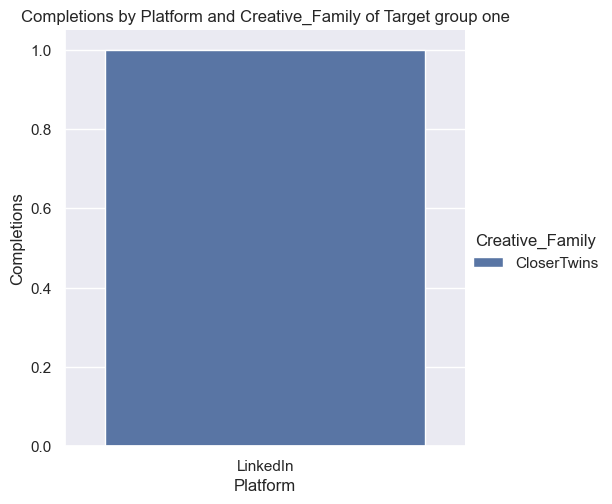

In [28]:
# Count plot of goal completions by platform and creative family TG1
sns.catplot(data=goal_stat_tg1a, x="Platform", y="Completions", hue="Creative_Family", kind="bar")

plt.title('Completions by Platform and Creative_Family of Target group one', fontsize=12)
# Set the plot style as white.
sns.set_theme(style="whitegrid")

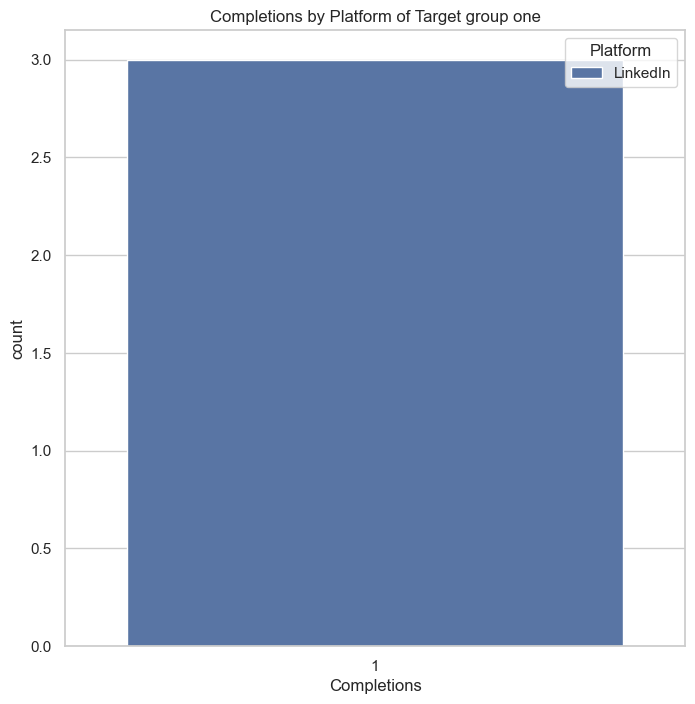

In [29]:
# countplot of goal completions by platform TG1
sns.countplot(data=goal_stat_tg1a, x="Completions", hue="Platform")

plt.title('Completions by Platform of Target group one', fontsize=12)
# Set the plot style as white.
sns.set_theme(style="whitegrid")

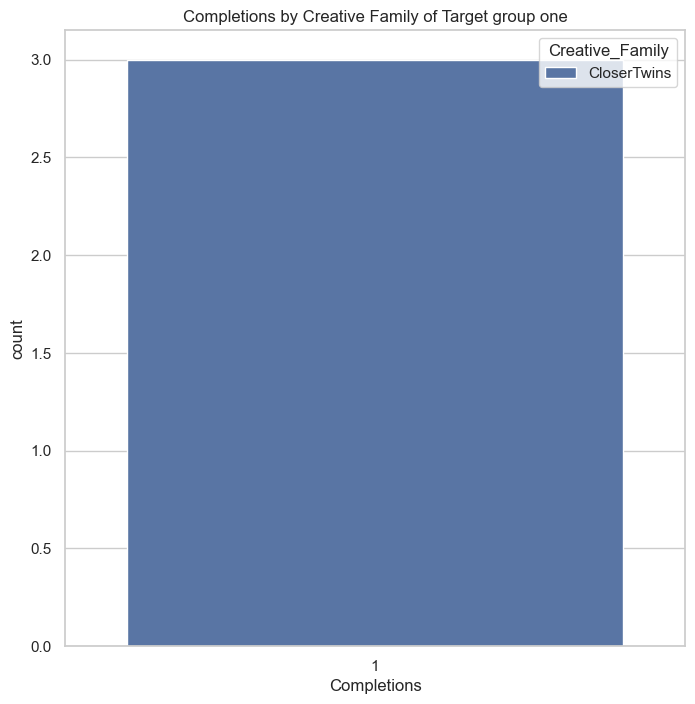

In [30]:
# countplot of goal completions by creative family TG1
sns.countplot(data=goal_stat_tg1a, x="Completions", hue="Creative_Family")

plt.title('Completions by Creative Family of Target group one', fontsize=12)
# Set the plot style as white.
sns.set_theme(style="whitegrid")

In [31]:
# Create the subset for Target Group 2
goal_stat_tg2 = goal_stat[goal_stat['Target_Groups']== '2']

# View DataFrame
goal_stat_tg2.head()

,Date,Campaign,Audience,Creative_Family,Creative_Version,Platform,Ad_Format,Goal,Completions,Campaign Traffic,Days away from max date,Latest_report,Target_Groups
4718,2022-04-20,NaN,4,NaN,NaN,NaN,NaN,utm_audience,1,General traffic,194,0,2
4719,2022-04-20,NaN,4,NaN,NaN,NaN,NaN,test4,1,General traffic,194,0,2
5728,2022-05-05,Broker_Campaign,4,CloseFaster,3steps,LinkedIn,Single image,Learn More (Community Mortgage),1,Campaign,179,0,2
5731,2022-04-29,Broker_Campaign,5,CloseFaster,3steps,LinkedIn,Single image,Learn More (Closer Twins Banner),1,Campaign,185,0,2
5732,2022-05-10,Broker_Campaign,5,CloseFaster,3steps,LinkedIn,Single image,Learn More (Closer Twins Banner),1,Campaign,174,0,2


In [32]:
# Create the subset for Target Group 3
goal_stat_tg3 = goal_stat[goal_stat['Target_Groups']== '3']

# View DataFrame
goal_stat_tg3.head()

,Date,Campaign,Audience,Creative_Family,Creative_Version,Platform,Ad_Format,Goal,Completions,Campaign Traffic,Days away from max date,Latest_report,Target_Groups
1771,2022-04-18,NaN,6,SEM Ads,NaN,Google SEM,CPC,Learn More (Community Mortgage),1,Campaign,196,0,3
1772,2022-04-18,NaN,6,SEM Ads,NaN,Google SEM,CPC,Get Approved,1,Campaign,196,0,3
1773,2022-04-18,NaN,6,SEM Ads,NaN,Google SEM,CPC,Learn More (Closer Twins Banner),1,Campaign,196,0,3
1774,2022-04-19,NaN,6,SEM Ads,NaN,Google SEM,CPC,Start Closing More,1,Campaign,195,0,3
1775,2022-04-19,NaN,6,SEM Ads,NaN,Google SEM,CPC,Learn More (Community Mortgage),1,Campaign,195,0,3


In [33]:
# create a subset for form submission
goal_stat_tg3a = goal_stat_tg3[goal_stat_tg3['Goal'] == 'Form Submission']

In [34]:
# view the dataframe
goal_stat_tg3a.head()

,Date,Campaign,Audience,Creative_Family,Creative_Version,Platform,Ad_Format,Goal,Completions,Campaign Traffic,Days away from max date,Latest_report,Target_Groups
1785,2022-04-20,NaN,6,SEM Ads,NaN,Google SEM,CPC,Form Submission,4,Campaign,194,0,3
1813,2022-04-23,NaN,6,SEM Ads,NaN,Google SEM,CPC,Form Submission,1,Campaign,191,0,3
1832,2022-04-26,NaN,6,SEM Ads,NaN,Google SEM,CPC,Form Submission,3,Campaign,188,0,3
1852,2022-04-27,NaN,6,SEM Ads,NaN,Google SEM,CPC,Form Submission,2,Campaign,187,0,3
1868,2022-04-28,NaN,6,SEM Ads,NaN,Google SEM,CPC,Form Submission,2,Campaign,186,0,3


In [35]:
goal_stat_tg3a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1785 to 16475
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     79 non-null     datetime64[ns]
 1   Campaign                 79 non-null     object        
 2   Audience                 79 non-null     object        
 3   Creative_Family          79 non-null     object        
 4   Creative_Version         79 non-null     object        
 5   Platform                 79 non-null     object        
 6   Ad_Format                79 non-null     object        
 7   Goal                     79 non-null     object        
 8   Completions              79 non-null     int64         
 9   Campaign Traffic         79 non-null     object        
 10  Days away from max date  79 non-null     int64         
 11  Latest_report            79 non-null     int64         
 12  Target_Groups            79 non-

Text(0.5, 1.0, 'Creative_Family distribution')

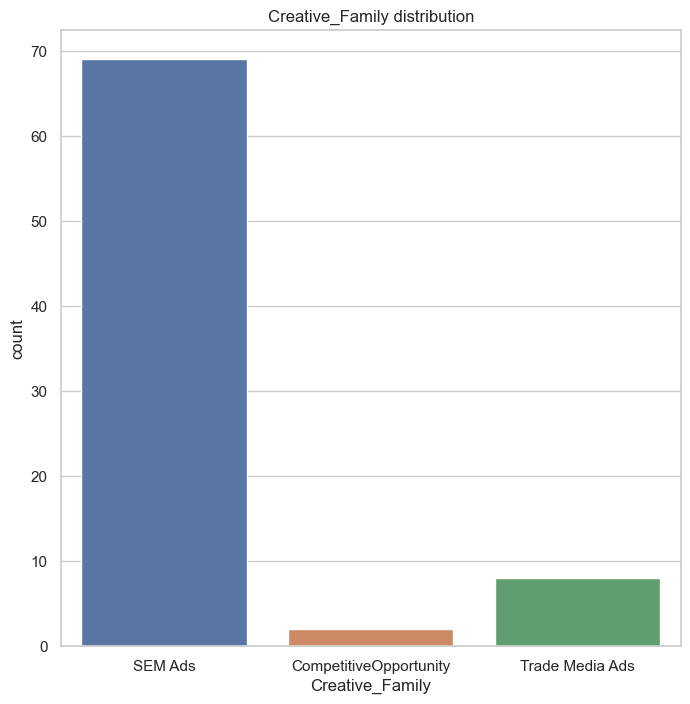

In [36]:
# countplot of Creative family distribution
sns.countplot(x=goal_stat_tg3a["Creative_Family"])

sns.set(rc={'figure.figsize': (8, 8)})
plt.title('Creative_Family distribution', fontsize=12)